### Environment Setup
Note: to save time, this notebook was run in two instances. Some cell results have been copied to this notebook, but should be accurate.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *

In [3]:
## Testing on Screaming Piha
# path_to_audio_files = "E:/Mixed_Bird/TEST/" 
# path_to_ground_truth = "E:/ScreamingPiha_Manual_Labels.csv"
# manual_df = pd.read_csv(path_to_ground_truth)
# manual_df['FOLDER'] = path_to_audio_files
# manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,E:/Mixed_Bird/TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,E:/Mixed_Bird/TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,E:/Mixed_Bird/TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,E:/Mixed_Bird/TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [5]:
# Testing on Mixed_Bird
path_to_audio_files = "E:/Mixed_Bird/wav/" 
path_to_ground_truth = "E:/MDD_Xeno_Canto_DSC180_Labels_uniform_3s_binary.csv"
manual_df = pd.read_csv(path_to_ground_truth)
manual_df['FOLDER'] = path_to_audio_files
manual_df

,IN FILE,CLIP LENGTH,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,FOLDER
0,Aburria-aburri-257423.wav,24.6335,0,3,44100,bird,E:/Mixed_Bird/wav/
1,Aburria-aburri-257423.wav,24.6335,3,3,44100,bird,E:/Mixed_Bird/wav/
2,Aburria-aburri-257423.wav,24.6335,6,3,44100,bird,E:/Mixed_Bird/wav/
3,Aburria-aburri-257423.wav,24.6335,18,3,44100,bird,E:/Mixed_Bird/wav/
4,Aburria-aburri-257423.wav,24.6335,21,3,44100,bird,E:/Mixed_Bird/wav/
...,...,...,...,...,...,...,...
22020,Zonotrichia-capensis-377483.wav,18.2596,0,3,44100,bird,E:/Mixed_Bird/wav/
22021,Zonotrichia-capensis-377483.wav,18.2596,3,3,44100,bird,E:/Mixed_Bird/wav/
22022,Zonotrichia-capensis-377483.wav,18.2596,6,3,44100,bird,E:/Mixed_Bird/wav/
22023,Zonotrichia-capensis-377483.wav,18.2596,12,3,44100,bird,E:/Mixed_Bird/wav/


In [8]:
# Testing on a 25% sample of Mixed_Bird
path_to_audio_files = "E:/training_data/"
path_to_ground_truth = "E:/025_DSC180_Xeno-Canto_Training_Data.csv"
manual_df = pd.read_csv(path_to_ground_truth)
manual_df['FOLDER'] = path_to_audio_files
manual_df

,Unnamed: 0,IN FILE,CLIP LENGTH,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,FOLDER
0,11,Accipiter-bicolor-451839.wav,5.66857,0,3,44100,bird,E:/training_data/
1,160,Aeronautes-montivagus-257782.wav,20.68900,0,3,44100,bird,E:/training_data/
2,161,Aeronautes-montivagus-257782.wav,20.68900,3,3,44100,bird,E:/training_data/
3,162,Aeronautes-montivagus-257782.wav,20.68900,6,3,44100,bird,E:/training_data/
4,163,Aeronautes-montivagus-257782.wav,20.68900,9,3,44100,bird,E:/training_data/
...,...,...,...,...,...,...,...,...
5312,21890,Zenaida-auriculata-77090.wav,48.90120,45,3,44100,bird,E:/training_data/
5313,21948,Zimmerius-bolivianus-232569.wav,31.03200,0,3,32000,bird,E:/training_data/
5314,21949,Zimmerius-bolivianus-232569.wav,31.03200,6,3,32000,bird,E:/training_data/
5315,21950,Zimmerius-bolivianus-232569.wav,31.03200,18,3,32000,bird,E:/training_data/


In [7]:
# Make a new csv with the manual labels of files in a folder
files = os.listdir(path_to_audio_files)
dscdf = pd.read_csv(path_to_ground_truth)
dscdf = dscdf[dscdf["IN FILE"].isin(files)]
#dscdf = [f for f in os.listdir(datasets_dir)]
dscdf.to_csv("E:/025_DSC180_Xeno-Canto_Training_Data.csv")

In [9]:
# Parameters to define isolation behavior
isolation_parameters_birdnet = {
   "model" : "birdnet",
    "type" : "lite",
   "output_path" : "outputs",
   "filetype" : "wav", 
   "num_predictions" : 1,
   "write_to_csv" : True
}

isolation_parameters_birdnet_analyzer = {
   "model" : "birdnet",
   "type" : "analyzer",
   "output_path" : "outputs",
   "filetype" : "wav", 
   "num_predictions" : 1,
   "write_to_csv" : True
}

isolation_parameters_micro = {
    "model" : "microfaune",
    "technique" : "chunk",
    "threshold_type" : "median",
    "threshold_const" : 4.0,
    "threshold_min" : 0.25,
    "window_size" : 2.0,
    "chunk_size" : 3.0
}

isolation_parameters_tweety = {
   "model" : "tweetynet",
    "tweety_output" : True,
    "chunk_size" : 3.0
}

labels_dict = {"birdnet-lite" : "E:/MDD_DSC180_ROC/MDD_DSC180_BirdNET_conf_05.csv",
               "birdnet-analyzer" : "E:/MDD_DSC180_ROC/MDD_DSC180_BirdNET_Analyzer_conf_05.csv",
            "micro" : "E:/MDD_DSC180_ROC/MDD_DSC180_Microfaune_Chunk_median_05_400.csv",
            "tweety" : "E:/MDD_DSC180_ROC/MDD_DSC180_Tweety_Native.csv"}
stats_dict = {"birdnet": "E:/MDD_DSC180_ROC/MDD_DSC180_BirdNET_Stats.csv",
              "birdnet-analyzer" : "E:/MDD_DSC180_ROC/MDD_DSC180_BirdNET_Analyzer_Stats",
            "micro" : "E:/MDD_DSC180_ROC/MDD_DSC180_Microfaune_Stats.csv",
            "tweety": "E:/MDD_DSC180_ROC/MDD_DSC180_TweetyNet_Stats.csv"}

# 25% Sample of Mixed_Bird
### BirdNET

In [12]:
automated_df_birdnet_lite, local_scores_birdnet_lite = generate_automated_labels(path_to_audio_files, 
                                                      isolation_parameters_birdnet, 
                                                      include_local_scores=True)

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.5 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 12 

ANALYZING AUDIO... DONE! Time 2.4 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 4.2 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.1 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 33 CHUNKS.
ANALYZING AUDIO... DONE! Time 5.8 SECONDS
DONE! WROTE 33 RESULTS.
READING AUDIO DATA... DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 4.6 SECONDS
DONE! WROTE 23 RESULTS.
READING AUDIO DATA... DONE! READ 10 CHUNKS.
ANALYZING AUDIO...

ANALYZING AUDIO... DONE! Time 3.6 SECONDS
DONE! WROTE 24 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.9 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.4 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.5 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.5 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 4.2 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO.

READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.7 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... DONE! READ 15 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.0 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.9 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.7 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... DONE! READ 19 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.1 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA..

ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.4 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.7 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.7 SECONDS
DONE! WROTE 30 RESULTS.
READING AUDIO DATA... DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DO

In [ ]:
display(automated_df_birdnet_lite)
display(local_scores_birdnet_lite)

In [13]:
automated_df_birdnet_lite.to_csv(labels_dict["birdnet-lite"],index=False)

In [10]:
%reload_ext autoreload
automated_df_birdnet_analyzer, local_scores_birdnet_analyzer = generate_automated_labels(path_to_audio_files, 
                                                          isolation_parameters_birdnet_analyzer,
                                                          include_local_scores=True)

PyHa/birdnet_analyzer/eBird_taxonomy_codes_2021E.json
Species list contains 2434 species
Found 604 files to analyze
1 / 604 processed: Accipiter-bicolor-451839.wav
2 / 604 processed: Aeronautes-montivagus-257782.wav
3 / 604 processed: Agamia-agami-75996.wav
4 / 604 processed: Agelasticus-xanthophthalmus-20921.wav
5 / 604 processed: Agelasticus-xanthophthalmus-218235.wav
6 / 604 processed: Aglaiocercus-kingii-70325.wav
7 / 604 processed: Akletos-goeldii-73873.wav
8 / 604 processed: Amaurolimnas-concolor-422467.wav
9 / 604 processed: Amazilia-viridicauda-91952.wav
10 / 604 processed: Amazona-farinosa-116.wav
11 / 604 processed: Amazona-ochrocephala-91561.wav
12 / 604 processed: Amazonetta-brasiliensis-116242.wav
13 / 604 processed: Amblycercus-holosericeus-262704.wav
14 / 604 processed: Anabacerthia-ruficaudata-23404.wav
15 / 604 processed: Anabacerthia-ruficaudata-66650.wav
16 / 604 processed: Anabacerthia-striaticollis-4286.wav
17 / 604 processed: Anairetes-flavirostris-463202.wav
18 /

159 / 604 processed: Dendrocolaptes-certhia-64101.wav
160 / 604 processed: Dendrocolaptes-picumnus-388506.wav
161 / 604 processed: Dendrocygna-autumnalis-440952.wav
162 / 604 processed: Dendrocygna-bicolor-476574.wav
163 / 604 processed: Dichrozona-cincta-40906.wav
164 / 604 processed: Diglossa-brunneiventris-74843.wav
165 / 604 processed: Diglossa-caerulescens-222422.wav
166 / 604 processed: Diglossa-glauca-20771.wav
167 / 604 processed: Discosura-langsdorffi-83821.wav
168 / 604 processed: Doryfera-ludovicae-257802.wav
169 / 604 processed: Drymophila-devillei-76086.wav
170 / 604 processed: Dryocopus-lineatus-542823.wav
171 / 604 processed: Egretta-caerulea-143584.wav
172 / 604 processed: Egretta-caerulea-145829.wav
173 / 604 processed: Elanoides-forficatus-545454.wav
174 / 604 processed: Entomodestes-leucotis-27854.wav
175 / 604 processed: Epinecrophylla-amazonica-7127.wav
176 / 604 processed: Epinecrophylla-leucophthalma-22458.wav
177 / 604 processed: Epinecrophylla-ornata-453582.wav

315 / 604 processed: Neopipo-cinnamomea-257105.wav
316 / 604 processed: Nephelomyias-pulcher-260923.wav
317 / 604 processed: Netta-peposaca-23277.wav
318 / 604 processed: Nomonyx-dominicus-530421.wav
319 / 604 processed: Nonnula-ruficapilla-108520.wav
320 / 604 processed: Nonnula-ruficapilla-343520.wav
321 / 604 processed: Nonnula-sclateri-16855.wav
322 / 604 processed: Notharchus-ordii-39937.wav
323 / 604 processed: Notharchus-tectus-257066.wav
324 / 604 processed: Nothocercus-nigrocapillus-36720.wav
325 / 604 processed: Nyctibius-aethereus-257041.wav
326 / 604 processed: Nyctibius-grandis-283506.wav
327 / 604 processed: Nyctibius-grandis-416483.wav
328 / 604 processed: Nyctibius-griseus-173730.wav
329 / 604 processed: Nyctibius-griseus-344944.wav
330 / 604 processed: Nyctiphrynus-ocellatus-18844.wav
331 / 604 processed: Nyctipolus-nigrescens-238703.wav
332 / 604 processed: Ocreatus-underwoodii-260519.wav
333 / 604 processed: Odontophorus-speciosus-10994.wav
334 / 604 processed: Odont

472 / 604 processed: Setophaga-fusca-17515.wav
473 / 604 processed: Setophaga-fusca-217955.wav
474 / 604 processed: Setophaga-palmarum-173794.wav
475 / 604 processed: Setophaga-pitiayumi-8391.wav
476 / 604 processed: Setophaga-striata-177224.wav
477 / 604 processed: Sicalis-flaveola-264871.wav
478 / 604 processed: Sicalis-flaveola-87700.wav
479 / 604 processed: Sirystes-albocinereus-258950.wav
480 / 604 processed: Sittasomus-griseicapillus-158001.wav
481 / 604 processed: Spatula-cyanoptera-100901.wav
482 / 604 processed: Spatula-cyanoptera-323984.wav
483 / 604 processed: Spatula-cyanoptera-324095.wav
484 / 604 processed: Spinus-olivaceus-45799.wav
485 / 604 processed: Spizaetus-isidori-260353.wav
486 / 604 processed: Spizaetus-isidori-276314.wav
487 / 604 processed: Spizaetus-tyrannus-373733.wav
488 / 604 processed: Spizaetus-tyrannus-481821.wav
489 / 604 processed: Sporophila-bouvronides-229865.wav
490 / 604 processed: Sporophila-bouvronides-229868.wav
491 / 604 processed: Sporophila-

In [14]:
automated_df_birdnet_analyzer.to_csv(labels_dict["birdnet-analyzer"],index=False)

In [10]:
# display(automated_df_birdnet_analyzer)
# display(local_scores_birdnet_analyzer)

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,71.000816,1,0.0,3.0,48000,Screaming Piha,0.9927
1,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,71.000816,1,3.0,3.0,48000,Screaming Piha,0.3483
2,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,71.000816,1,6.0,3.0,48000,Black-faced Antthrush,0.2215
3,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,71.000816,1,9.0,3.0,48000,Screaming Piha,0.5232
4,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,71.000816,1,9.0,3.0,48000,Golden-crowned Spadebill,0.1193
...,...,...,...,...,...,...,...,...,...
7,E:/Mixed_Bird/TEST/,ScreamingPiha9.wav,81.203537,1,21.0,3.0,48000,Screaming Piha,0.9906
8,E:/Mixed_Bird/TEST/,ScreamingPiha9.wav,81.203537,1,24.0,3.0,48000,Screaming Piha,0.9931
9,E:/Mixed_Bird/TEST/,ScreamingPiha9.wav,81.203537,1,27.0,3.0,48000,Screaming Piha,0.6480
10,E:/Mixed_Bird/TEST/,ScreamingPiha9.wav,81.203537,1,30.0,3.0,48000,Screaming Piha,0.9921


{'ScreamingPiha1.wav': [0.9927,
  0.3483,
  0.2215,
  0.5232,
  0.1193,
  0.7647,
  0.2341,
  0.1407,
  0.1949,
  0.1204,
  0.2329,
  0.1383,
  0.1019,
  0.2743,
  0.1603,
  0.975,
  0.1269,
  0.9979,
  0.9934,
  0.9977,
  0.9979,
  0.1886,
  0.994,
  0.2171,
  0.9986,
  0.9965,
  0.153,
  0.103,
  0.9934,
  0.3637,
  0.9946,
  0.9905,
  0.2664,
  0.9978,
  0.991,
  0.2296,
  0.9987,
  0.6896,
  0.208,
  0.1337,
  0.1312,
  0.104,
  0.9967,
  0.9948,
  0.2844,
  0.9994,
  0.9959,
  0.139,
  0.1802,
  0.1747,
  0.13,
  0.9565,
  0.9994,
  0.9994,
  0.212,
  0.171,
  0.1081,
  1.0,
  0.9985,
  0.7835,
  0.9993,
  0.2418,
  0.2396,
  0.116,
  0.4459,
  0.3562,
  0.9987,
  0.9841,
  0.1025,
  0.9943,
  0.2822,
  0.9991,
  0.9986,
  0.9155,
  0.1467,
  0.1012,
  0.9966,
  0.7003,
  0.9732,
  0.9994,
  0.1055,
  0.9958,
  0.9986,
  0.87,
  0.4074,
  0.9574,
  0.9825,
  0.2834,
  0.735,
  0.998,
  0.5942,
  0.1133,
  0.715,
  0.8513,
  0.8051,
  0.9393,
  0.9978,
  0.9996,
  0.9987,
  0.9501,

### Microfaune

In [ ]:
automated_df_micro, local_scores_micro = generate_automated_labels(path_to_audio_files,
                                                                   isolation_parameters_micro,
                                                                   include_local_scores=True)

Failed to DownsampleEmberizoides-herbicola-84495.wav
Error in detection, skipping Emberizoides-herbicola-84495.wav
can't extend empty axis 0 using modes other than 'constant' or 'empty'


In [ ]:
automated_df_micro.to_csv(labels_dict["micro"],index=False)

In [11]:
# display(automated_df_micro)
# display(local_scores_micro)

,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,DURATION,MANUAL ID,CONFIDENCE
0,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,0,32.615986,44100,0.0,3.000000,bird,1.000000
1,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,0,32.615986,44100,12.0,3.000000,bird,0.751979
2,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,0,32.615986,44100,15.0,3.000000,bird,0.309065
3,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,0,32.615986,44100,21.0,3.000000,bird,0.799661
4,E:/Mixed_Bird/TEST/,ScreamingPiha1.wav,0,32.615986,44100,30.0,2.615986,bird,0.692367
...,...,...,...,...,...,...,...,...,...
58,E:/Mixed_Bird/TEST/,ScreamingPiha8.wav,0,44.120816,44100,42.0,2.120816,bird,0.996684
59,E:/Mixed_Bird/TEST/,ScreamingPiha9.wav,0,37.302857,44100,0.0,3.000000,bird,0.696958
60,E:/Mixed_Bird/TEST/,ScreamingPiha9.wav,0,37.302857,44100,6.0,3.000000,bird,0.814078
61,E:/Mixed_Bird/TEST/,ScreamingPiha9.wav,0,37.302857,44100,12.0,3.000000,bird,1.000000


{'ScreamingPiha1.wav': array([0.02040735, 0.01758876, 0.02380133, ..., 0.00590673, 0.00683486,
        0.00968456], dtype=float32),
 'ScreamingPiha10.wav': array([0.01883966, 0.01492792, 0.01579261, ..., 0.00443324, 0.00509796,
        0.00692183], dtype=float32),
 'ScreamingPiha11.wav': array([0.01288706, 0.00801867, 0.00801054, ..., 0.00808406, 0.00944793,
        0.0137355 ], dtype=float32),
 'ScreamingPiha2.wav': array([0.01413944, 0.0092274 , 0.009159  , ..., 0.00432727, 0.00543365,
        0.0075604 ], dtype=float32),
 'ScreamingPiha3.wav': array([0.02384833, 0.01820624, 0.02276829, 0.03135386, 0.04160744,
        0.04378667, 0.02830943, 0.01067263, 0.00672412, 0.00556204,
        0.00492787, 0.00434518, 0.00414827, 0.00430602, 0.00487235,
        0.00584465, 0.00650734, 0.0070684 , 0.00811052, 0.01239562,
        0.02093431, 0.04003242, 0.03537497, 0.01309857, 0.00741807,
        0.0059078 , 0.00495112, 0.00457871, 0.0045096 , 0.0049305 ,
        0.00585943, 0.00787973, 0.009424

### TweetyNet


In [8]:
automated_df_tweety, local_scores_tweety = generate_automated_labels(path_to_audio_files,
                                                                     isolation_parameters_tweety,
                                                                     include_local_scores=True)

Error in detection, skipping ScreamingPiha7.wav
integer division or modulo by zero


In [ ]:
automated_df_tweety.to_csv(labels_dict["tweety"],index=False)

In [ ]:
# display(automated_df_tweety)
# display(local_scores_tweety)

In [ ]:
stats_df_tw = automated_labeling_statistics(automated_df_tweety, piha_manual_df, stats_type = "general")
stats_df_tw.to_csv(stats_dict["tweety"])
display(global_dataset_statistics(stats_df_tw))

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.79432,0.42836,0.556572,0.385591


## Model Comparison using ROC Curves for 25% Sample of Mixed_Bird

In [16]:
from sklearn import metrics

In [70]:
# read in saved csvs of automatically generated labels
path_to_csvs = "E:/MDD_DSC180_ROC/"
automated_df_micro = pd.read_csv(path_to_csvs + "025_Mixed_Bird_wConf_Microfaune_chunk_30_median_40_250.csv")
automated_df_birdnet_lite = pd.read_csv(path_to_csvs + "025_Mixed_Bird_wConf_BirdNET_Lite_conf_05.csv")
automated_df_birdnet_analyzer = pd.read_csv(path_to_csvs + "025_Mixed_Bird_wConf_BirdNET_Analyzer_conf_05.csv")
automated_df_tweety = pd.read_csv(path_to_csvs + "025_Mixed_Bird_wConf_Tweety_Native.csv")

In [64]:
# BirdNET-Analyzer's (BNA) clip lengths are messed up, so this maps the clip lengths
# from the manual DataFrame to the BNA DataFrame
def file_to_clip_map(filename):
    try:
        md = manual_df.groupby(by="IN FILE").mean()["CLIP LENGTH"]
        return md.loc[filename]
    except:
        return ""
bna_df["MANUAL ID"] = "bird"
bna_df = automated_df_birdnet_analyzer.groupby(by=["IN FILE", "OFFSET"]).max().reset_index()
bna_df["CLIP LENGTH"] = bna_df["IN FILE"].apply(file_to_clip_map)
bna_df

,IN FILE,OFFSET,FOLDER,CLIP LENGTH,CHANNEL,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,Accipiter-bicolor-451839.wav,0.0,E:/training_data/,5.66857,1,3.0,48000,bird,0.7094
1,Aeronautes-montivagus-257782.wav,0.0,E:/training_data/,20.68900,1,3.0,48000,bird,0.2589
2,Aeronautes-montivagus-257782.wav,12.0,E:/training_data/,20.68900,1,3.0,48000,bird,0.6834
3,Aeronautes-montivagus-257782.wav,15.0,E:/training_data/,20.68900,1,3.0,48000,bird,0.1454
4,Agamia-agami-75996.wav,3.0,E:/training_data/,9.31200,1,3.0,48000,bird,0.3803
...,...,...,...,...,...,...,...,...,...
5357,Zenaida-auriculata-77090.wav,45.0,E:/training_data/,48.90120,1,3.0,48000,bird,0.7844
5358,Zimmerius-bolivianus-232569.wav,6.0,E:/training_data/,31.03200,1,3.0,48000,bird,0.1232
5359,Zimmerius-bolivianus-232569.wav,12.0,E:/training_data/,31.03200,1,3.0,48000,bird,0.5614
5360,Zimmerius-bolivianus-232569.wav,21.0,E:/training_data/,31.03200,1,3.0,48000,bird,0.4559


In [63]:
manual_df.groupby(by="IN FILE").mean()["CLIP LENGTH"]

IN FILE
Accipiter-bicolor-451839.wav                  5.66857
Aeronautes-montivagus-257782.wav             20.68900
Agamia-agami-75996.wav                        9.31200
Agelasticus-xanthophthalmus-20921.wav        38.34780
Agelasticus-xanthophthalmus-218235.wav        7.41600
                                               ...   
Xiphocolaptes-promeropirhynchus-91223.wav    50.52080
Xiphorhynchus-obsoletus-556680.wav            7.46400
Xiphorhynchus-ocellatus-330978.wav            5.72082
Zenaida-auriculata-77090.wav                 48.90120
Zimmerius-bolivianus-232569.wav              31.03200
Name: CLIP LENGTH, Length: 594, dtype: float64

In [39]:
display(global_dataset_statistics(stats_df_micro).style.set_caption("Microfaune Annotations"))
display(global_dataset_statistics(stats_df_birdnet_lite).style.set_caption("BirdNET-Lite Annotations"))
display(global_dataset_statistics(stats_df_birdnet_analyzer).style.set_caption("BirdNET-Analyzer Annotations"))
display(global_dataset_statistics(stats_df_tweety).style.set_caption("TweetyNET Annotations"))

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.415801,0.577958,0.483650,0.318956


,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.373407,0.995190,0.543054,0.372735


,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.404053,0.805828,0.538231,0.368205


,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.839080,0.843385,0.841227,0.725964


                 FOLDER                                IN FILE  CLIP LENGTH  \
0     E:/training_data/  Agelasticus-xanthophthalmus-20921.wav    38.347755   
1     E:/training_data/  Agelasticus-xanthophthalmus-20921.wav    38.347755   
2     E:/training_data/  Agelasticus-xanthophthalmus-20921.wav    38.347755   
3     E:/training_data/  Agelasticus-xanthophthalmus-20921.wav    38.347755   
4     E:/training_data/  Agelasticus-xanthophthalmus-20921.wav    38.347755   
...                 ...                                    ...          ...   
5379  E:/training_data/           Zenaida-auriculata-77090.wav    48.901224   
5380  E:/training_data/           Zenaida-auriculata-77090.wav    48.901224   
5381  E:/training_data/           Zenaida-auriculata-77090.wav    48.901224   
5382  E:/training_data/           Zenaida-auriculata-77090.wav    48.901224   
5383  E:/training_data/           Zenaida-auriculata-77090.wav    48.901224   

      CHANNEL  OFFSET  DURATION  SAMPLE RATE MANUAL

                 FOLDER                           IN FILE  CLIP LENGTH  \
0     E:/training_data/      Accipiter-bicolor-451839.wav      5.66857   
1     E:/training_data/  Aeronautes-montivagus-257782.wav     20.68900   
2     E:/training_data/  Aeronautes-montivagus-257782.wav     20.68900   
3     E:/training_data/  Aeronautes-montivagus-257782.wav     20.68900   
4     E:/training_data/  Aeronautes-montivagus-257782.wav     20.68900   
...                 ...                               ...          ...   
6943  E:/training_data/   Zimmerius-bolivianus-232569.wav     31.03200   
6944  E:/training_data/   Zimmerius-bolivianus-232569.wav     31.03200   
6945  E:/training_data/   Zimmerius-bolivianus-232569.wav     31.03200   
6946  E:/training_data/   Zimmerius-bolivianus-232569.wav     31.03200   
6947  E:/training_data/   Zimmerius-bolivianus-232569.wav     31.03200   

      CHANNEL  OFFSET  DURATION  SAMPLE RATE MANUAL ID  CONFIDENCE  
0           0     0.0       3.0        480

0.7379972604160603

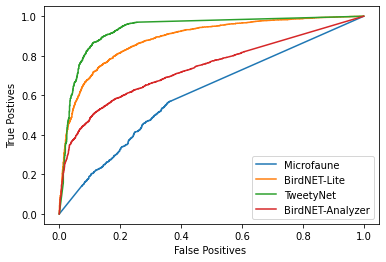

In [66]:
generate_ROC_curves(automated_df_micro, manual_df,label="Microfaune", chunk_length = 3)
generate_ROC_curves(automated_df_birdnet_lite, manual_df, label="BirdNET-Lite", chunk_length = 3)
generate_ROC_curves(automated_df_tweety, manual_df, label="TweetyNet", chunk_length = 3)
generate_ROC_curves(bna_df, manual_df, label="BirdNET-Analyzer", chunk_length = 3)

## Model Comparison using ROC Curves for all clips in Mixed_Bird

In [45]:
%reload_ext autoreload
automated_df_birdnet_analyzer, local_scores_birdnet_analyzer = generate_automated_labels(path_to_audio_files, 
                                                          isolation_parameters_birdnet_analyzer,
                                                          include_local_scores=True)

PyHa/birdnet_analyzer/eBird_taxonomy_codes_2021E.json
Species list contains 2434 species
Found 2877 files to analyze
1 / 2877 processed: Aburria-aburri-257423.wav
2 / 2877 processed: Aburria-aburri-387212.wav
3 / 2877 processed: Accipiter-bicolor-451839.wav
4 / 2877 processed: Accipiter-collaris-260335.wav
5 / 2877 processed: Accipiter-collaris-260336.wav
6 / 2877 processed: Accipiter-poliogaster-121768.wav
7 / 2877 processed: Accipiter-poliogaster-40546.wav
8 / 2877 processed: Accipiter-striatus-481896.wav
9 / 2877 processed: Accipiter-striatus-497793.wav
10 / 2877 processed: Accipiter-superciliosus-329800.wav
11 / 2877 processed: Accipiter-superciliosus-427037.wav
12 / 2877 processed: Actitis-macularius-257516.wav
13 / 2877 processed: Actitis-macularius-257519.wav
14 / 2877 processed: Actitis-macularius-415533.wav
15 / 2877 processed: Actitis-macularius-448472.wav
16 / 2877 processed: Adelomyia-melanogenys-218195.wav
17 / 2877 processed: Adelomyia-melanogenys-45834.wav
18 / 2877 proc

158 / 2877 processed: Ardea-cocoi-414790.wav
Error: Cannot open audio file E:/Mixed_Bird/wav/\Ardea-cocoi-414790.wav
159 / 2877 processed: Ardea-cocoi-476510.wav
160 / 2877 processed: Arenaria-interpres-145872.wav
161 / 2877 processed: Arenaria-interpres-257523.wav
162 / 2877 processed: Arenaria-interpres-406194.wav
163 / 2877 processed: Arenaria-interpres-406195.wav
164 / 2877 processed: Arremon-brunneinucha-277138.wav
165 / 2877 processed: Arremon-brunneinucha-27766.wav
166 / 2877 processed: Arremon-brunneinucha-297000.wav
167 / 2877 processed: Arremon-castaneiceps-261298.wav
168 / 2877 processed: Arremon-castaneiceps-40019.wav
169 / 2877 processed: Arremon-castaneiceps-59419.wav
170 / 2877 processed: Arremon-taciturnus-219073.wav
171 / 2877 processed: Arremon-taciturnus-31078.wav
172 / 2877 processed: Arremon-taciturnus-74721.wav
173 / 2877 processed: Arundinicola-leucocephala-111441.wav
174 / 2877 processed: Arundinicola-leucocephala-111444.wav
175 / 2877 processed: Arundinicola-le

308 / 2877 processed: Cacicus-chrysonotus-468833.wav
309 / 2877 processed: Cacicus-chrysonotus-47321.wav
310 / 2877 processed: Cacicus-haemorrhous-114258.wav
311 / 2877 processed: Cacicus-haemorrhous-384621.wav
312 / 2877 processed: Cacicus-koepckeae-62893.wav
313 / 2877 processed: Cacicus-koepckeae-63202.wav
314 / 2877 processed: Cacicus-oseryi-11894.wav
315 / 2877 processed: Cacicus-oseryi-336652.wav
316 / 2877 processed: Cacicus-solitarius-196527.wav
317 / 2877 processed: Cacicus-solitarius-206728.wav
318 / 2877 processed: Cacicus-solitarius-461421.wav
319 / 2877 processed: Calidris-alba-257526.wav
320 / 2877 processed: Calidris-alba-257527.wav
321 / 2877 processed: Calidris-alba-70466.wav
322 / 2877 processed: Calidris-alba-92032.wav
323 / 2877 processed: Calidris-bairdii-147070.wav
324 / 2877 processed: Calidris-bairdii-147071.wav
325 / 2877 processed: Calidris-bairdii-147073.wav
326 / 2877 processed: Calidris-bairdii-74680.wav
327 / 2877 processed: Calidris-fuscicollis-115521.wav

462 / 2877 processed: Chaetocercus-mulsant-260535.wav
463 / 2877 processed: Chaetura-brachyura-257779.wav
464 / 2877 processed: Chaetura-brachyura-257780.wav
465 / 2877 processed: Chaetura-brachyura-257781.wav
466 / 2877 processed: Chaetura-cinereiventris-108100.wav
467 / 2877 processed: Chaetura-cinereiventris-333040.wav
468 / 2877 processed: Chaetura-cinereiventris-427191.wav
469 / 2877 processed: Chaetura-egregia-11891.wav
470 / 2877 processed: Chaetura-egregia-257055.wav
471 / 2877 processed: Chaetura-pelagica-1369.wav
472 / 2877 processed: Chaetura-pelagica-149418.wav
473 / 2877 processed: Chaetura-pelagica-457517.wav
474 / 2877 processed: Chaetura-viridipennis-130080.wav
475 / 2877 processed: Chaetura-viridipennis-3625.wav
476 / 2877 processed: Chaetura-viridipennis-39480.wav
477 / 2877 processed: Chaetura-viridipennis-91306.wav
478 / 2877 processed: Chamaepetes-goudotii-238123.wav
479 / 2877 processed: Chamaepetes-goudotii-238124.wav
480 / 2877 processed: Chamaepetes-goudotii-25

611 / 2877 processed: Coeligena-violifer-2066.wav
612 / 2877 processed: Coeligena-violifer-36512.wav
613 / 2877 processed: Coereba-flaveola-120284.wav
614 / 2877 processed: Coereba-flaveola-297013.wav
615 / 2877 processed: Coereba-flaveola-37645.wav
616 / 2877 processed: Colaptes-punctigula-254141.wav
617 / 2877 processed: Colaptes-punctigula-264520.wav
618 / 2877 processed: Colaptes-punctigula-275877.wav
619 / 2877 processed: Colaptes-punctigula-542462.wav
620 / 2877 processed: Colaptes-punctigula-549903.wav
621 / 2877 processed: Colaptes-rivolii-16152.wav
622 / 2877 processed: Colaptes-rivolii-17369.wav
623 / 2877 processed: Colaptes-rivolii-228004.wav
624 / 2877 processed: Colaptes-rivolii-258035.wav
625 / 2877 processed: Colaptes-rivolii-6599.wav
626 / 2877 processed: Colaptes-rivolii-88569.wav
627 / 2877 processed: Colaptes-rubiginosus-238176.wav
628 / 2877 processed: Colaptes-rubiginosus-238180.wav
629 / 2877 processed: Colaptes-rubiginosus-3374.wav
630 / 2877 processed: Colaptes

766 / 2877 processed: Cyanerpes-nitidus-257131.wav
767 / 2877 processed: Cyanerpes-nitidus-38583.wav
768 / 2877 processed: Cyanocorax-cyanomelas-116255.wav
769 / 2877 processed: Cyanocorax-cyanomelas-340955.wav
770 / 2877 processed: Cyanocorax-cyanomelas-90563.wav
771 / 2877 processed: Cyanocorax-violaceus-180579.wav
772 / 2877 processed: Cyanocorax-violaceus-416305.wav
773 / 2877 processed: Cyanocorax-violaceus-47678.wav
774 / 2877 processed: Cyanocorax-yncas-27791.wav
775 / 2877 processed: Cyanocorax-yncas-296844.wav
776 / 2877 processed: Cyanocorax-yncas-47864.wav
777 / 2877 processed: Cyanolyca-viridicyanus-18905.wav
778 / 2877 processed: Cyanolyca-viridicyanus-222117.wav
779 / 2877 processed: Cyanolyca-viridicyanus-27852.wav
780 / 2877 processed: Cyclarhis-gujanensis-222130.wav
781 / 2877 processed: Cyclarhis-gujanensis-47379.wav
782 / 2877 processed: Cyclarhis-gujanensis-5619.wav
783 / 2877 processed: Cymbilaimus-lineatus-151819.wav
784 / 2877 processed: Cymbilaimus-lineatus-2439

922 / 2877 processed: Elaenia-flavogaster-550350.wav
923 / 2877 processed: Elaenia-flavogaster-6548.wav
924 / 2877 processed: Elaenia-gigas-196864.wav
925 / 2877 processed: Elaenia-gigas-344205.wav
926 / 2877 processed: Elaenia-gigas-347746.wav
927 / 2877 processed: Elaenia-pallatangae-264672.wav
928 / 2877 processed: Elaenia-pallatangae-468893.wav
929 / 2877 processed: Elaenia-pallatangae-88575.wav
930 / 2877 processed: Elaenia-parvirostris-205368.wav
931 / 2877 processed: Elaenia-parvirostris-348111.wav
932 / 2877 processed: Elaenia-parvirostris-498064.wav
933 / 2877 processed: Elaenia-spectabilis-257096.wav
934 / 2877 processed: Elaenia-spectabilis-344852.wav
935 / 2877 processed: Elaenia-spectabilis-501423.wav
936 / 2877 processed: Elaenia-spectabilis-5037.wav
937 / 2877 processed: Elaenia-strepera-1728.wav
938 / 2877 processed: Elanoides-forficatus-260331.wav
939 / 2877 processed: Elanoides-forficatus-545454.wav
940 / 2877 processed: Elanus-leucurus-102175.wav
941 / 2877 processed

1074 / 2877 processed: Formicarius-rufipectus-75347.wav
1075 / 2877 processed: Formicivora-rufa-418041.wav
1076 / 2877 processed: Formicivora-rufa-427395.wav
1077 / 2877 processed: Formicivora-rufa-42870.wav
1078 / 2877 processed: Formicivora-rufa-80192.wav
1079 / 2877 processed: Forpus-modestus-3971.wav
1080 / 2877 processed: Forpus-modestus-47438.wav
1081 / 2877 processed: Forpus-modestus-47910.wav
1082 / 2877 processed: Forpus-xanthopterygius-283823.wav
1083 / 2877 processed: Forpus-xanthopterygius-42665.wav
1084 / 2877 processed: Forpus-xanthopterygius-6319.wav
1085 / 2877 processed: Frederickena-unduliger-223213.wav
1086 / 2877 processed: Frederickena-unduliger-22814.wav
1087 / 2877 processed: Furnarius-leucopus-129028.wav
1088 / 2877 processed: Furnarius-leucopus-27804.wav
1089 / 2877 processed: Furnarius-leucopus-47719.wav
1090 / 2877 processed: Galbalcyrhynchus-purusianus-223268.wav
1091 / 2877 processed: Galbalcyrhynchus-purusianus-41689.wav
1092 / 2877 processed: Galbalcyrhyn

1225 / 2877 processed: Hemitriccus-iohannis-47557.wav
1226 / 2877 processed: Hemitriccus-rufigularis-111412.wav
1227 / 2877 processed: Hemitriccus-rufigularis-258783.wav
1228 / 2877 processed: Hemitriccus-rufigularis-260899.wav
1229 / 2877 processed: Hemitriccus-rufigularis-3122.wav
1230 / 2877 processed: Hemitriccus-rufigularis-4289.wav
1231 / 2877 processed: Hemitriccus-rufigularis-68464.wav
1232 / 2877 processed: Hemitriccus-striaticollis-47846.wav
1233 / 2877 processed: Hemitriccus-striaticollis-47847.wav
1234 / 2877 processed: Henicorhina-leucophrys-224039.wav
1235 / 2877 processed: Henicorhina-leucophrys-47403.wav
1236 / 2877 processed: Henicorhina-leucophrys-62995.wav
1237 / 2877 processed: Herpetotheres-cachinnans-47439.wav
1238 / 2877 processed: Herpetotheres-cachinnans-9763.wav
1239 / 2877 processed: Herpetotheres-cachinnans-9764.wav
1240 / 2877 processed: Herpsilochmus-axillaris-209075.wav
1241 / 2877 processed: Herpsilochmus-axillaris-297018.wav
1242 / 2877 processed: Herps

1373 / 2877 processed: Lathrotriccus-euleri-224883.wav
1374 / 2877 processed: Lathrotriccus-euleri-27849.wav
1375 / 2877 processed: Legatus-leucophaius-14917.wav
1376 / 2877 processed: Legatus-leucophaius-210080.wav
1377 / 2877 processed: Legatus-leucophaius-224904.wav
1378 / 2877 processed: Legatus-leucophaius-288951.wav
1379 / 2877 processed: Leistes-militaris-257158.wav
1380 / 2877 processed: Leistes-militaris-257159.wav
1381 / 2877 processed: Leistes-superciliaris-13939.wav
1382 / 2877 processed: Leistes-superciliaris-84748.wav
1383 / 2877 processed: Lepidocolaptes-fatimalimae-20683.wav
1384 / 2877 processed: Lepidocolaptes-fatimalimae-39016.wav
1385 / 2877 processed: Lepidocolaptes-fatimalimae-497996.wav
1386 / 2877 processed: Lepidocolaptes-fatimalimae-91465.wav
1387 / 2877 processed: Lepidocolaptes-fuscicapillus-91467.wav
1388 / 2877 processed: Lepidocolaptes-lacrymiger-224946.wav
1389 / 2877 processed: Lepidocolaptes-lacrymiger-224947.wav
1390 / 2877 processed: Lepidothrix-coer

1523 / 2877 processed: Micrastur-buckleyi-260360.wav
1524 / 2877 processed: Micrastur-buckleyi-264381.wav
1525 / 2877 processed: Micrastur-buckleyi-30968.wav
1526 / 2877 processed: Micrastur-gilvicollis-188628.wav
1527 / 2877 processed: Micrastur-gilvicollis-260354.wav
1528 / 2877 processed: Micrastur-gilvicollis-262862.wav
1529 / 2877 processed: Micrastur-gilvicollis-27793.wav
1530 / 2877 processed: Micrastur-gilvicollis-38879.wav
1531 / 2877 processed: Micrastur-gilvicollis-504935.wav
1532 / 2877 processed: Micrastur-mirandollei-13392.wav
1533 / 2877 processed: Micrastur-mirandollei-370558.wav
1534 / 2877 processed: Micrastur-ruficollis-147162.wav
1535 / 2877 processed: Micrastur-ruficollis-435754.wav
1536 / 2877 processed: Micrastur-ruficollis-542797.wav
1537 / 2877 processed: Micrastur-ruficollis-62632.wav
1538 / 2877 processed: Micrastur-semitorquatus-102711.wav
1539 / 2877 processed: Micrastur-semitorquatus-420105.wav
1540 / 2877 processed: Micrastur-semitorquatus-453544.wav
1541

1673 / 2877 processed: Myiornis-ecaudatus-257098.wav
1674 / 2877 processed: Myiornis-ecaudatus-257099.wav
1675 / 2877 processed: Myiotheretes-fumigatus-296752.wav
1676 / 2877 processed: Myiotheretes-fumigatus-47694.wav
1677 / 2877 processed: Myiotheretes-fuscorufus-165783.wav
1678 / 2877 processed: Myiotheretes-fuscorufus-394768.wav
1679 / 2877 processed: Myiotheretes-striaticollis-226201.wav
1680 / 2877 processed: Myiotheretes-striaticollis-226202.wav
1681 / 2877 processed: Myiothlypis-bivittata-288780.wav
1682 / 2877 processed: Myiothlypis-bivittata-3095.wav
1683 / 2877 processed: Myiothlypis-bivittata-452.wav
1684 / 2877 processed: Myiothlypis-bivittata-99606.wav
1685 / 2877 processed: Myiothlypis-chrysogaster-11903.wav
1686 / 2877 processed: Myiothlypis-chrysogaster-226207.wav
1687 / 2877 processed: Myiothlypis-coronata-14613.wav
1688 / 2877 processed: Myiothlypis-coronata-450258.wav
1689 / 2877 processed: Myiothlypis-coronata-45678.wav
1690 / 2877 processed: Myiothlypis-fulvicauda

1821 / 2877 processed: Nyctiphrynus-ocellatus-336120.wav
1822 / 2877 processed: Nyctiphrynus-ocellatus-428649.wav
1823 / 2877 processed: Nyctipolus-nigrescens-238703.wav
1824 / 2877 processed: Nyctipolus-nigrescens-238704.wav
1825 / 2877 processed: Nyctipolus-nigrescens-257048.wav
1826 / 2877 processed: Nyctipolus-nigrescens-257049.wav
1827 / 2877 processed: Nystalus-chacuru-233569.wav
1828 / 2877 processed: Nystalus-chacuru-504234.wav
1829 / 2877 processed: Nystalus-obamai-7063.wav
1830 / 2877 processed: Nystalus-striolatus-171057.wav
1831 / 2877 processed: Nystalus-striolatus-226795.wav
1832 / 2877 processed: Nystalus-striolatus-38581.wav
1833 / 2877 processed: Ochthoeca-cinnamomeiventris-258888.wav
1834 / 2877 processed: Ochthoeca-cinnamomeiventris-65312.wav
1835 / 2877 processed: Ochthoeca-cinnamomeiventris-7074.wav
1836 / 2877 processed: Ochthornis-littoralis-258895.wav
1837 / 2877 processed: Ochthornis-littoralis-264725.wav
1838 / 2877 processed: Ochthornis-littoralis-81817.wav
1

1970 / 2877 processed: Phalaropus-tricolor-105342.wav
1971 / 2877 processed: Phalaropus-tricolor-294469.wav
1972 / 2877 processed: Pharomachrus-antisianus-152684.wav
1973 / 2877 processed: Pharomachrus-antisianus-45787.wav
1974 / 2877 processed: Pharomachrus-antisianus-45788.wav
1975 / 2877 processed: Pharomachrus-auriceps-47263.wav
1976 / 2877 processed: Pharomachrus-auriceps-47264.wav
1977 / 2877 processed: Pharomachrus-auriceps-97953.wav
1978 / 2877 processed: Pharomachrus-pavoninus-203200.wav
1979 / 2877 processed: Pharomachrus-pavoninus-29853.wav
1980 / 2877 processed: Pheucticus-aureoventris-19963.wav
1981 / 2877 processed: Pheucticus-aureoventris-2179.wav
1982 / 2877 processed: Pheucticus-aureoventris-47183.wav
1983 / 2877 processed: Pheucticus-aureoventris-556110.wav
1984 / 2877 processed: Pheugopedius-coraya-180652.wav
1985 / 2877 processed: Pheugopedius-coraya-296709.wav
1986 / 2877 processed: Pheugopedius-coraya-39020.wav
1987 / 2877 processed: Pheugopedius-genibarbis-156052

2118 / 2877 processed: Platyrinchus-coronatus-90.wav
2119 / 2877 processed: Platyrinchus-mystaceus-47830.wav
2120 / 2877 processed: Platyrinchus-mystaceus-47831.wav
2121 / 2877 processed: Platyrinchus-mystaceus-542846.wav
2122 / 2877 processed: Platyrinchus-platyrhynchos-119456.wav
2123 / 2877 processed: Platyrinchus-platyrhynchos-228410.wav
2124 / 2877 processed: Platyrinchus-platyrhynchos-483143.wav
2125 / 2877 processed: Plegadis-ridgwayi-16857.wav
2126 / 2877 processed: Plegadis-ridgwayi-45895.wav
2127 / 2877 processed: Plegadis-ridgwayi-45896.wav
2128 / 2877 processed: Pluvialis-dominica-308704.wav
2129 / 2877 processed: Pluvialis-dominica-308708.wav
2130 / 2877 processed: Pluvialis-dominica-406168.wav
2131 / 2877 processed: Podilymbus-podiceps-152210.wav
2132 / 2877 processed: Podilymbus-podiceps-451362.wav
2133 / 2877 processed: Podilymbus-podiceps-552802.wav
2134 / 2877 processed: Poecilotriccus-albifacies-228440.wav
2135 / 2877 processed: Poecilotriccus-albifacies-64123.wav
21

2265 / 2877 processed: Rhegmatorhina-melanosticta-229065.wav
2266 / 2877 processed: Rhegmatorhina-melanosticta-69376.wav
2267 / 2877 processed: Rhynchocyclus-fulvipectus-264697.wav
2268 / 2877 processed: Rhynchocyclus-fulvipectus-354301.wav
2269 / 2877 processed: Rhynchocyclus-olivaceus-421399.wav
2270 / 2877 processed: Rhynchocyclus-olivaceus-525963.wav
2271 / 2877 processed: Rhynchocyclus-olivaceus-91509.wav
2272 / 2877 processed: Rhynchotus-rufescens-266341.wav
2273 / 2877 processed: Rhynchotus-rufescens-506429.wav
2274 / 2877 processed: Rhytipterna-simplex-12289.wav
2275 / 2877 processed: Rhytipterna-simplex-144403.wav
2276 / 2877 processed: Rhytipterna-simplex-270933.wav
2277 / 2877 processed: Rhytipterna-simplex-270934.wav
2278 / 2877 processed: Rhytipterna-simplex-556559.wav
2279 / 2877 processed: Riparia-riparia-325094.wav
2280 / 2877 processed: Riparia-riparia-557434.wav
2281 / 2877 processed: Rollandia-rolland-23338.wav
2282 / 2877 processed: Rollandia-rolland-51139.wav
2283 

2418 / 2877 processed: Spizaetus-ornatus-3967.wav
2419 / 2877 processed: Spizaetus-ornatus-7826.wav
2420 / 2877 processed: Spizaetus-ornatus-85417.wav
2421 / 2877 processed: Spizaetus-tyrannus-296723.wav
2422 / 2877 processed: Spizaetus-tyrannus-373733.wav
2423 / 2877 processed: Spizaetus-tyrannus-481821.wav
2424 / 2877 processed: Sporophila-bouvronides-229865.wav
2425 / 2877 processed: Sporophila-bouvronides-229868.wav
2426 / 2877 processed: Sporophila-bouvronides-6210.wav
2427 / 2877 processed: Sporophila-bouvronides-92433.wav
2428 / 2877 processed: Sporophila-bouvronides-92435.wav
2429 / 2877 processed: Sporophila-bouvronides-92438.wav
2430 / 2877 processed: Sporophila-caerulescens-236277.wav
2431 / 2877 processed: Sporophila-caerulescens-476325.wav
2432 / 2877 processed: Sporophila-caerulescens-506265.wav
2433 / 2877 processed: Sporophila-castaneiventris-229880.wav
2434 / 2877 processed: Sporophila-castaneiventris-229881.wav
2435 / 2877 processed: Sporophila-castaneiventris-259869.

2569 / 2877 processed: Taphrospilus-hypostictus-262878.wav
2570 / 2877 processed: Taphrospilus-hypostictus-262879.wav
2571 / 2877 processed: Taphrospilus-hypostictus-262880.wav
2572 / 2877 processed: Taraba-major-122578.wav
2573 / 2877 processed: Taraba-major-122579.wav
2574 / 2877 processed: Taraba-major-122581.wav
2575 / 2877 processed: Terenotriccus-erythrurus-138898.wav
2576 / 2877 processed: Terenotriccus-erythrurus-225990.wav
2577 / 2877 processed: Terenotriccus-erythrurus-225991.wav
2578 / 2877 processed: Terenotriccus-erythrurus-258844.wav
2579 / 2877 processed: Tersina-viridis-259674.wav
2580 / 2877 processed: Tersina-viridis-297017.wav
2581 / 2877 processed: Tersina-viridis-436513.wav
2582 / 2877 processed: Tersina-viridis-46442.wav
2583 / 2877 processed: Thalurania-furcata-232899.wav
2584 / 2877 processed: Thalurania-furcata-493156.wav
2585 / 2877 processed: Thalurania-furcata-498055.wav
2586 / 2877 processed: Thamnistes-anabatinus-260755.wav
2587 / 2877 processed: Thamniste

2719 / 2877 processed: Tringa-melanoleuca-474951.wav
2720 / 2877 processed: Tringa-melanoleuca-506281.wav
2721 / 2877 processed: Tringa-solitaria-152419.wav
2722 / 2877 processed: Tringa-solitaria-415535.wav
2723 / 2877 processed: Tringa-solitaria-443437.wav
2724 / 2877 processed: Troglodytes-aedon-231541.wav
2725 / 2877 processed: Troglodytes-aedon-5599.wav
2726 / 2877 processed: Troglodytes-solstitialis-36281.wav
2727 / 2877 processed: Troglodytes-solstitialis-47182.wav
2728 / 2877 processed: Trogon-collaris-231642.wav
2729 / 2877 processed: Trogon-collaris-231643.wav
2730 / 2877 processed: Trogon-collaris-231644.wav
2731 / 2877 processed: Trogon-curucui-122626.wav
2732 / 2877 processed: Trogon-curucui-231669.wav
2733 / 2877 processed: Trogon-curucui-34399.wav
2734 / 2877 processed: Trogon-curucui-428107.wav
2735 / 2877 processed: Trogon-curucui-493215.wav
2736 / 2877 processed: Trogon-melanurus-231702.wav
2737 / 2877 processed: Trogon-personatus-270291.wav
2738 / 2877 processed: Tro

2873 / 2877 processed: Zimmerius-gracilipes-258668.wav
2874 / 2877 processed: Zimmerius-gracilipes-258669.wav
2875 / 2877 processed: Zonotrichia-capensis-232609.wav
2876 / 2877 processed: Zonotrichia-capensis-377483.wav
2877 / 2877 processed: Zonotrichia-capensis-47546.wav
Something went wrong with 82 clips out of 2877 files


In [47]:
automated_df_tweety, local_scores_tweety = generate_automated_labels(path_to_audio_files,
                                                                     isolation_parameters_tweety,
                                                                     include_local_scores=True)

Error in detection, skipping Ardea-cocoi-414790.wav
integer division or modulo by zero
Error in detection, skipping Bartramia-longicauda-507855.wav
integer division or modulo by zero
Error in detection, skipping Coeligena-violifer-2065.wav
integer division or modulo by zero
Failed to DownsampleEmberizoides-herbicola-84495.wav
Error in detection, skipping Emberizoides-herbicola-84495.wav
can't extend empty axis 0 using modes other than 'constant' or 'empty'
Error in detection, skipping Inezia-inornata-461402.wav
integer division or modulo by zero
Error in isolating bird calls from Progne-tapera-558285.wav
max() arg is an empty sequence


In [3]:
# read in saved csvs
path_to_csvs = "E:/MDD_DSC180_ROC/"
automated_df_micro = pd.read_csv(path_to_csvs + "100_Mixed_Bird_wConf_Microfaune_Chunk_30_median_40_025.csv")
automated_df_birdnet_lite = pd.read_csv(path_to_csvs + "100_Mixed_Bird_wConf_BirdNET_Lite_conf_05.csv")
automated_df_birdnet_analyzer = pd.read_csv(path_to_csvs + "100_Mixed_Bird_wConf_BirdNET_Analyzer_conf_05.csv")
automated_df_tweety = pd.read_csv(path_to_csvs + "100_Mixed_Bird_wConf_Tweety_Native.csv")

In [6]:
path_to_ground_truth = "E:/mixed_bird_manual.csv"
manual_df = pd.read_csv(path_to_ground_truth)
manual_df['FOLDER'] = path_to_audio_files
manual_df
# files = os.listdir(path_to_audio_files)
# dscdf = pd.read_csv(path_to_ground_truth)
# dscdf = dscdf[dscdf["IN FILE"].isin(files)]
# #dscdf = [f for f in os.listdir(datasets_dir)]
# dscdf.to_csv("E:/025_DSC180_Xeno-Canto_Training_Data.csv")

,Unnamed: 0,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,FOLDER
0,0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,E:/Mixed_Bird/wav/
1,1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,E:/Mixed_Bird/wav/
2,2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,E:/Mixed_Bird/wav/
3,3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,24000,0,44100,Aburria aburri Wattled Guan,184.388,alarce,11/22/2021,3:28:01,E:/Mixed_Bird/wav/
4,4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,24000,0,44100,Aburria aburri Wattled Guan,184.385,alarce,11/22/2021,3:28:01,E:/Mixed_Bird/wav/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31360,31360,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.174,JacobGlennAyers,10/10/2021,2:06:40,E:/Mixed_Bird/wav/
31361,31361,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.135,JacobGlennAyers,10/10/2021,2:06:40,E:/Mixed_Bird/wav/
31362,31362,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.527,JacobGlennAyers,10/18/2021,17:33:36,E:/Mixed_Bird/wav/
31363,31363,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.543,JacobGlennAyers,10/18/2021,17:33:36,E:/Mixed_Bird/wav/


In [7]:
def file_to_clip_map(filename):
    try:
        md = manual_df.groupby(by="IN FILE").mean()["CLIP LENGTH"]
        return md.loc[filename]
    except:
        return ""


bna_df = automated_df_birdnet_analyzer.groupby(by=["IN FILE", "OFFSET"]).max().reset_index()
bna_df["MANUAL ID"] = "bird"
bna_df["CLIP LENGTH"] = bna_df["IN FILE"].apply(file_to_clip_map)
bna_df

,IN FILE,OFFSET,FOLDER,CLIP LENGTH,CHANNEL,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,Aburria-aburri-257423.wav,3.0,E:/Mixed_Bird/wav/,24.6335,1,3.0,48000,bird,0.9997
1,Aburria-aburri-257423.wav,6.0,E:/Mixed_Bird/wav/,24.6335,1,3.0,48000,bird,0.5549
2,Aburria-aburri-257423.wav,9.0,E:/Mixed_Bird/wav/,24.6335,1,3.0,48000,bird,0.8600
3,Aburria-aburri-257423.wav,12.0,E:/Mixed_Bird/wav/,24.6335,1,3.0,48000,bird,0.8411
4,Aburria-aburri-257423.wav,15.0,E:/Mixed_Bird/wav/,24.6335,1,3.0,48000,bird,0.3518
...,...,...,...,...,...,...,...,...,...
27861,Zonotrichia-capensis-47546.wav,33.0,E:/Mixed_Bird/wav/,54.9355,1,3.0,48000,bird,0.2224
27862,Zonotrichia-capensis-47546.wav,42.0,E:/Mixed_Bird/wav/,54.9355,1,3.0,48000,bird,0.9372
27863,Zonotrichia-capensis-47546.wav,45.0,E:/Mixed_Bird/wav/,54.9355,1,3.0,48000,bird,0.7529
27864,Zonotrichia-capensis-47546.wav,48.0,E:/Mixed_Bird/wav/,54.9355,1,3.0,48000,bird,0.4014


In [55]:
stats_df_micro = automated_labeling_statistics(automated_df_micro,manual_df,stats_type = "general");
stats_df_birdnet_lite = automated_labeling_statistics(automated_df_birdnet_lite,manual_df,stats_type = "general");
stats_df_birdnet_analyzer = automated_labeling_statistics(automated_df_birdnet_analyzer,manual_df,stats_type = "general");
stats_df_tweety = automated_labeling_statistics(automated_df_tweety,manual_df,stats_type = "general");

Something went wrong with 68 clips out of 2066 clips
Something went wrong with 2 clips out of 2876 clips
Something went wrong with 28 clips out of 2795 clips
Something went wrong with 3 clips out of 2857 clips


In [56]:
display(global_dataset_statistics(stats_df_micro).style.set_caption("Microfaune Annotations"))
display(global_dataset_statistics(stats_df_birdnet_lite).style.set_caption("BirdNET-Lite Annotations"))
display(global_dataset_statistics(stats_df_birdnet_analyzer).style.set_caption("BirdNET-Analyzer Annotations"))
display(global_dataset_statistics(stats_df_tweety).style.set_caption("TweetyNET Annotations"))

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.395363,0.588168,0.472868,0.309644


,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.358172,0.995610,0.526820,0.357608


,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.382620,0.786019,0.514695,0.346525


,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.806305,0.836766,0.821253,0.696717


                   FOLDER                         IN FILE  CLIP LENGTH  \
0      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
1      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
2      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
3      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
4      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
...                   ...                             ...          ...   
23668  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   
23669  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   
23670  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   
23671  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   
23672  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   

       CHANNEL  OFFSET  DURATION  SAMPLE RATE MANUAL ID  CONFIDENCE  
0            0     0.0       3.0        4

                   FOLDER                         IN FILE  CLIP LENGTH  \
0      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
1      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
2      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
3      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
4      E:/Mixed_Bird/wav/       Aburria-aburri-257423.wav    24.633469   
...                   ...                             ...          ...   
29893  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   
29894  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   
29895  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   
29896  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   
29897  E:/Mixed_Bird/wav/  Zonotrichia-capensis-47546.wav    54.935510   

       CHANNEL  OFFSET  DURATION  SAMPLE RATE MANUAL ID  CONFIDENCE  
0            0     0.0       3.0        4

0.6901894667414277

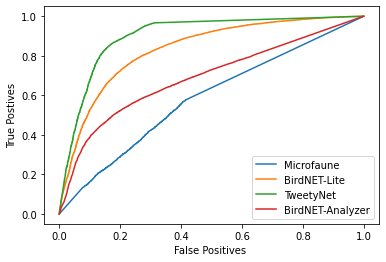

In [8]:
generate_ROC_curves(automated_df_micro, manual_df,label="Microfaune", chunk_length = 3)
generate_ROC_curves(automated_df_birdnet_lite, manual_df, label="BirdNET-Lite", chunk_length = 3)
generate_ROC_curves(automated_df_tweety, manual_df, label="TweetyNet", chunk_length = 3)
generate_ROC_curves(bna_df, manual_df, label="BirdNET-Analyzer", chunk_length = 3)